<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/db_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## 1) Replicate the lesson code.

In [0]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# use the 'magic' symbol (%) to specify some non-python code (i.e., affects the underlying jupyter kernel).
%matplotlib inline
'''
That line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.
if you are using another editor, you'll use: 
 plt.show() 
at the end of all your plotting commands to have the figure pop up in another window.
'''

"\nThat line is only for jupyter notebooks, and allows plt figures to show up in your noteboook.\nif you are using another editor, you'll use: \n plt.show() \nat the end of all your plotting commands to have the figure pop up in another window.\n"

In [0]:
# Specify the plot style we want to use
plt.style.use('fast')
# Although fast is the default style so we really don't have to set it

Part 1. Pandas Built in Visualization Tools

In [4]:
# Read in titanic dataset
url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'

df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [5]:
# Cabin class is categorical
# it can be displayed using number or string values
df['cabin_class'] = df['Pclass'].map({1:'first', 2:'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


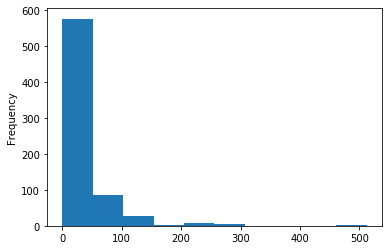

In [6]:
# Fare is a continuous variable so it can be displayed with a histogram
df['Fare'].plot(kind='hist');

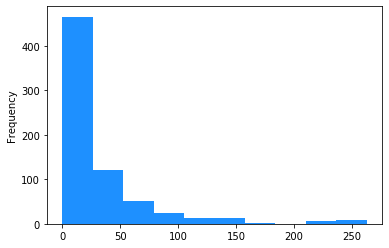

In [8]:
# Remove the extreme outliers
df = df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='dodgerblue');

In [9]:
# A continuous variable can be converted to categorical using binning
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']
df['fare_groups'] = pd.cut(df['Fare'], bins=farebins, labels=farelabels)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class,fare_groups
0,0,3,male,22.0,7.2500,Southampton,third,low
1,1,1,female,38.0,71.2833,Cherbourg,first,vhigh
2,1,3,female,26.0,7.9250,Southampton,third,low
3,1,1,female,35.0,53.1000,Southampton,first,vhigh
4,0,3,male,35.0,8.0500,Southampton,third,medium


In [0]:
myresults = df['fare_groups'].value_counts().sort_index()

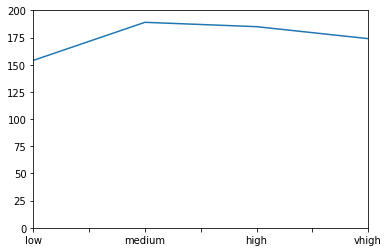

In [11]:
# Sometimes it's important to specify the range of your y-axis to ensure more accurate results
myresults.plot(ylim=(0,200));

Display single continuous variable

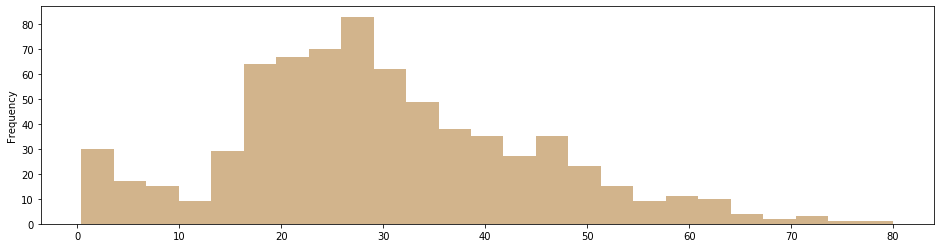

In [12]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

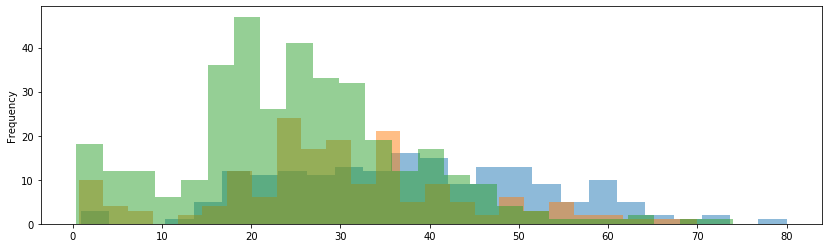

In [13]:
# Stacked histogram of continuous variable, broken out by categorical variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(14,4), alpha=0.5);


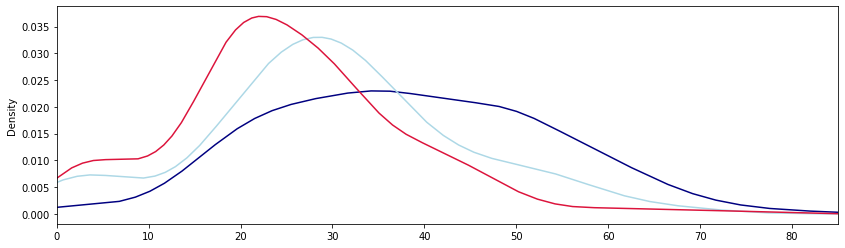

In [14]:
# This is easier read using a kernel density estimate (kde)
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(0,85), figsize=(14,4), color='crimson');

Display Single Categorical Variable

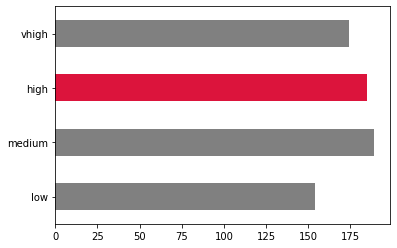

In [15]:
# Bar chart. Use colors to make a particular value pop!
df['fare_groups'].value_counts().sort_index().plot(kind='barh', color=['gray', 'gray', 'crimson', 'gray']);

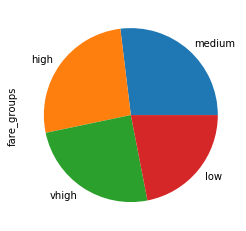

In [17]:
# Pie Chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

Compare two categorical variables

In [0]:
# Using crosstab
cab_survive = pd.crosstab(df['cabin_class'], df['Survived'])

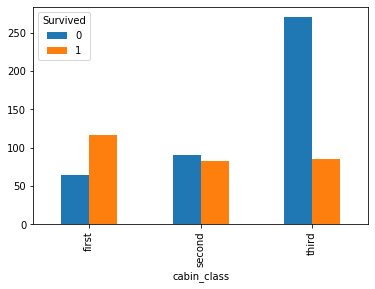

In [22]:
# Make that into a bar chart
cab_survive.plot(kind='bar');

In [0]:
# Crosstab with column percents
cab_survive1 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')

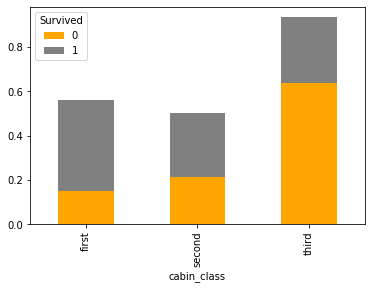

In [24]:
# Make a stacked bar chart 
cab_survive1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
# Crosstab with index percents
cab_survive2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')

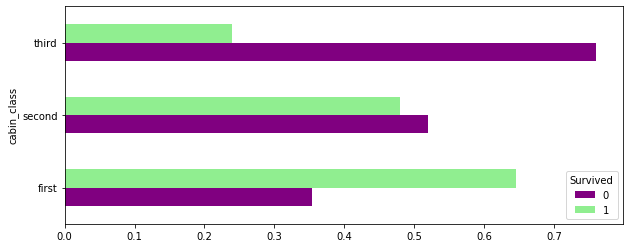

In [26]:
# A paired barchart 
cab_survive2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

Compare a categorical and a continuous

In [27]:
# Look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [0]:
# Explore that continuous variable broken out by a categorical variable
cab_age = df.groupby('cabin_class')['Age'].mean()

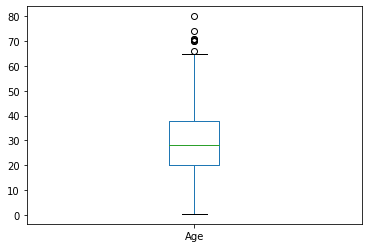

In [30]:
# Visualize single continuous
df['Age'].plot(kind='box');

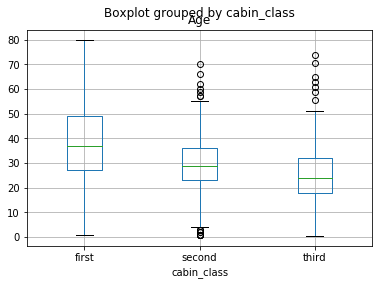

In [31]:
# But to break out a continuoys variable by a categorical, use .boxplot
df.boxplot(column='Age', by='cabin_class');

Compare Two or Three Continuous Variables

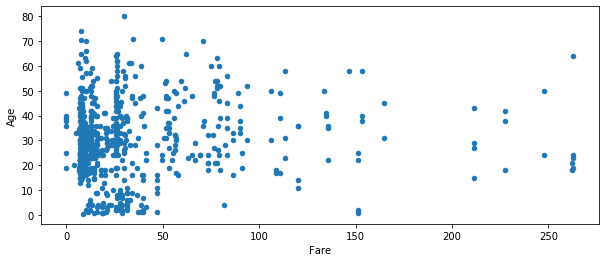

In [32]:
# Two continuous variables
df.plot(kind='scatter', x='Fare', y='Age', figsize=(10,4));

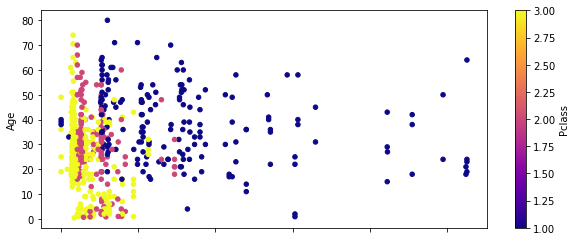

In [33]:
# Three variables
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(10,4));

Use lineplot to examine two continuous variables

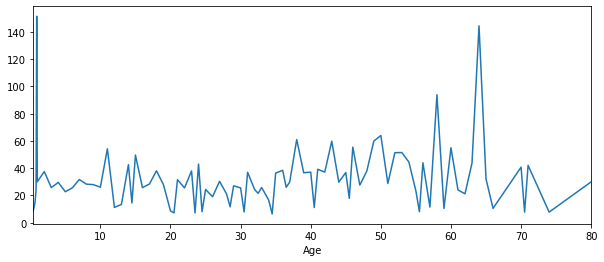

In [34]:
# line chart
df.groupby('Age')['Fare'].mean().plot(kind='line', figsize=(10,4));

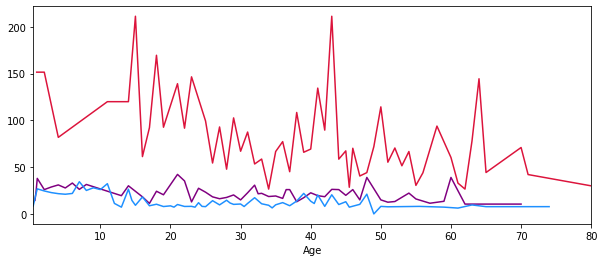

In [35]:
# Line chart
mycolors = ['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots 
# you can just loop through the values
for x in [1,2,3]:
  df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(10,4), color=mycolors[x-1]);

Compare multiple continuoys variables

In [36]:
# Correlation matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


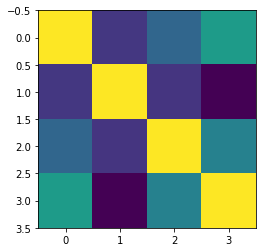

In [37]:
# Display correlation matrix as a heatmap
plt.imshow(corr_matrix);

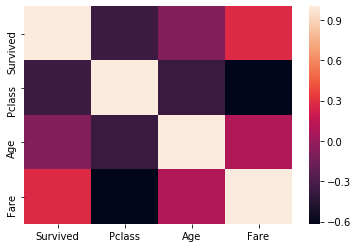

In [38]:
# This is better looking with seaborn code though
import seaborn as sns
sns.heatmap(corr_matrix);

Intro to Matplotlib

In [0]:
import numpy as np
x = np.linspace(0, 5, 11)
y = x ** 2

In [40]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [41]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

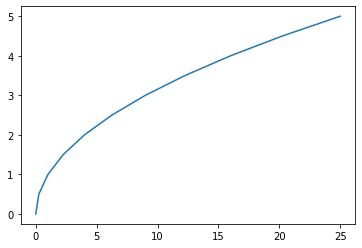

In [44]:
# Very simple plot to get started
plt.plot(y,x);

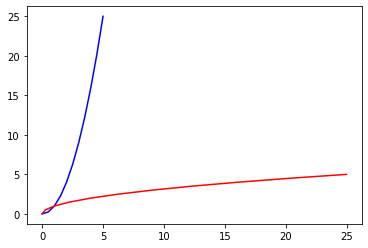

In [46]:
# You can have two plt plots together 
plt.plot(x, y, 'b')
plt.plot(y, x, 'r');

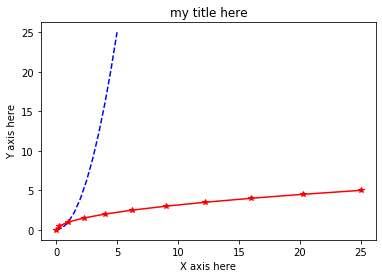

In [47]:
# Now add labels and some texture
plt.plot(x, y, 'b--')
plt.plot(y, x, 'r*-')
plt.xlabel('X axis here')
plt.ylabel('Y axis here')
plt.title('my title here');

Creating multiplots with the same canvas

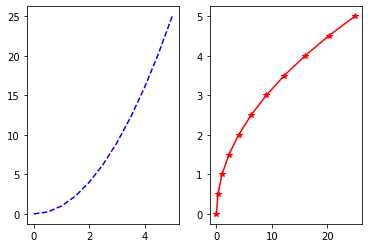

In [48]:
# Basic syntax: plt.subplot(nrows, ncols, plot_number)
plt.subplot(1,2,1)
plt.plot(x, y, 'b--')

plt.subplot(1,2,2)
plt.plot(y, x, 'r*-');

Matplotlib object oriented method

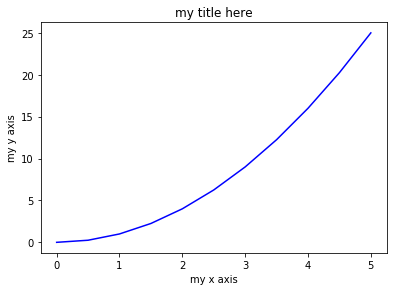

In [49]:
# Create figure (the empty canvas)
fig = plt.figure()
# Add set of axes to figure
# left, bottom, width, height (range 0 to 1)
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('my x axis')
axes.set_ylabel('my y axis')
axes.set_title('my title here');

We can easily add more than one axis to a figure

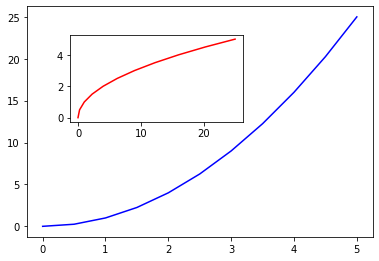

In [52]:
# Creates blank canvas
fig = plt.figure()
axes1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Larger figure axes 1
axes1.plot(x, y, 'b')
# Insert figure axes 2
axes2.plot(y, x, 'r');

subplots method

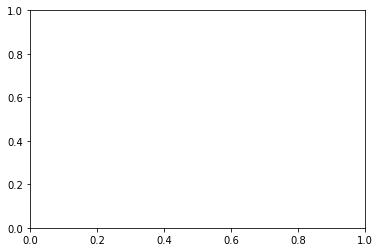

In [53]:
fig, ax = plt.subplots()

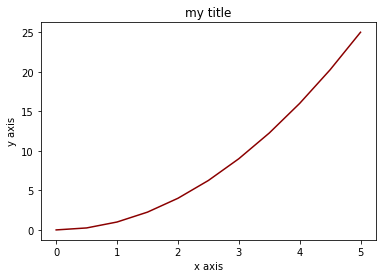

In [54]:
# Use tuple unpacking to grab fig and axes
fig, axes = plt.subplots(nrows=1, ncols=1)

# Default is (1,1)

# Use axes object to add stuff to plot
axes.plot(x, y, 'darkred')
axes.set_xlabel('x axis')
axes.set_ylabel('y axis')
axes.set_title('my title');

Then you can specify number of rows and columns when creating the subplots() object

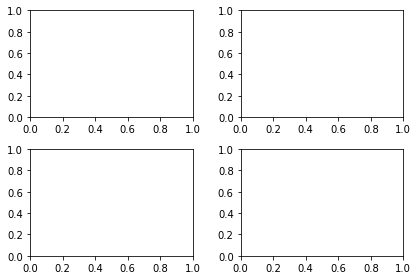

In [58]:
# Empty canvas of 1 by 2 subplots
fig, axes = plt.subplots(nrows=2, ncols=2)
# parameter labels 'nrows' and 'ncols' are optional
plt.tight_layout()

In [59]:
# Axes is an array of axes to plot on 
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe3ea7b8f60>,
      dtype=object)

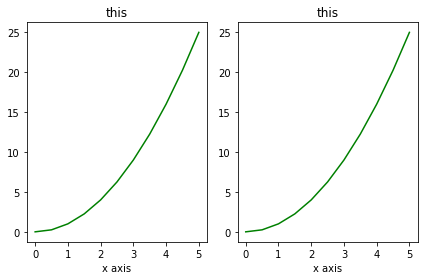

In [61]:
# We can iterate through this array
fig, axes = plt.subplots(nrows=1, ncols=2)

# Display the figure object
for ax in axes:
  ax.plot(x, y, 'g')
  ax.set_xlabel('x axis')
  ax.set_title('this');
plt.tight_layout();


Figure size, aspect ratio, and dpi

In [63]:
# Matplotlib allows the aspect ratio, DPI and figure size to be specified when the Figure object is created.
# dpi = dots per inch
fig = plt.figure(figsize=(8,4), dpi=100)

<Figure size 800x400 with 0 Axes>

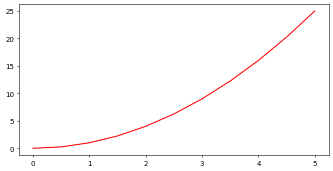

In [64]:
fig, axes = plt.subplots(figsize=(8,4), dpi=50)
axes.plot(x, y, 'r');

Saving Figures

In [0]:
fig.savefig('filename.png')

In [0]:
# We can also specify the dpi
fig.savefig('filename.png', dpi=200)

Legends, Labels and titles


In [67]:
ax.set_title('my title')

Text(0.5, 1, 'my title')

In [68]:
ax.set_xlabel('x label')

Text(0.5, 17.200000000000003, 'x label')

In [69]:
ax.set_ylabel('y label')

Text(213.8, 0.5, 'y label')

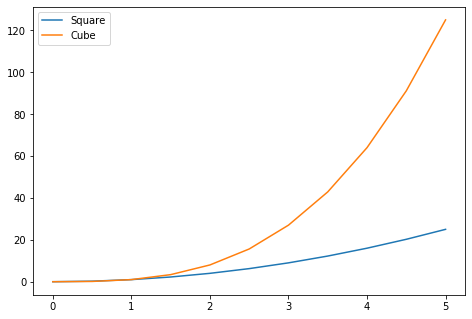

In [70]:
# Legends 
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax
ax.plot(x, x**2, label='Square')
ax.plot(x, x**3, label='Cube')
ax.legend();

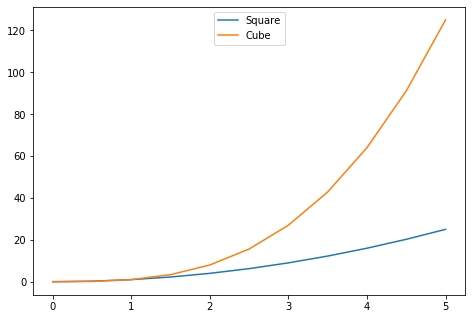

In [79]:
# legend takes optional keyword argument loc; this specifies 
# where to put the legend in the figure
ax.legend(loc=1)
ax.legend(loc=2)
ax.legend(loc=3)
ax.legend(loc=4)
ax.legend(loc=5)
ax.legend(loc=6)
ax.legend(loc=7)
ax.legend(loc=8)
ax.legend(loc=9)
fig

Colors with matlab like syntax

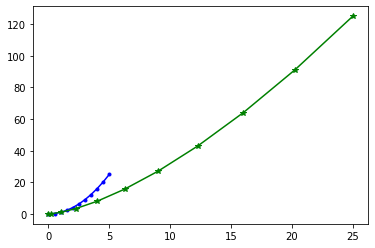

In [81]:
# Matlab style line color and style
fig, ax = plt.subplots()
# blue line with dots
ax.plot(x, x**2, 'b.-')
# green dashed line
ax.plot(y, x**3, 'g-*');

Colors with the color = parameter

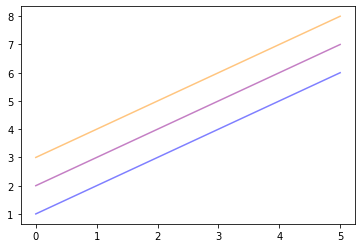

In [82]:
fig, ax = plt.subplots()
# half-transparant
ax.plot(x, x+1, color='blue', alpha=0.5)
# RGB hex code
ax.plot(x, x+2, color='#8B008B', alpha=0.5)
# RGB hex code
ax.plot(x, x+3, color='#FF8C00', alpha=0.5);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here